파이썬은 다중 상속을 지원하며 그것에 의해 Mixins 를 만들 수 있다. Mixin 은 클래스에 추가적인 속성이나 메소드를 제공하는 것을 말하는데, 스칼라는 traits 를 통해서 제공하며, 루비등도 제공한다. 파이썬은 Mixin 을 위한 특별한 키워드는 없으며, 단지 다중상속을 통해서 만들기 때문에 이 과정에서 문제가 생길 소지가 생긴다.


초반 예제는 믹스인에 대한 개념을 혼란스럽게 하기 때문에 스킵한다.

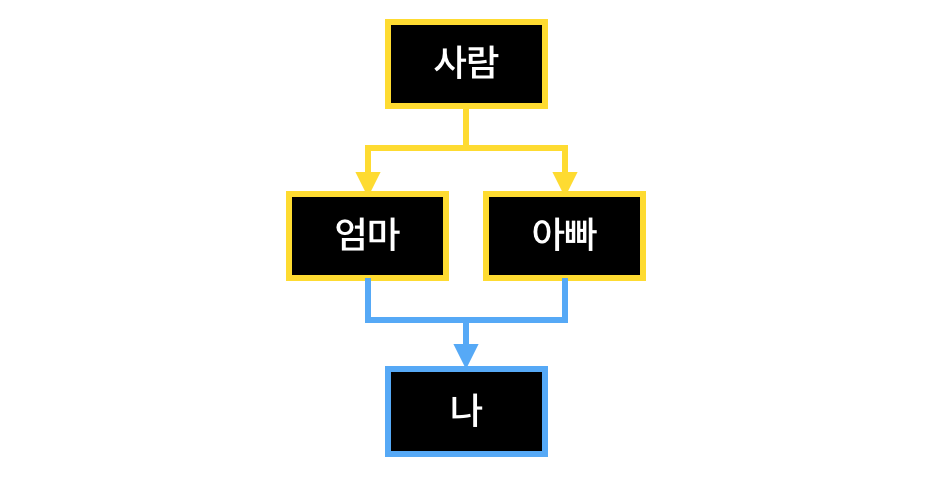

In [93]:
from IPython.display import Image
Image(filename='study/160611_mixin.png')

"엄마", "아빠" 두 가지 모두를 상속받아야 하는 객체지향적으로 ??????????

이 발표에서 준비한 믹스인의 범위는 구체적인 부분까지는 설명하지 못하고 추상적인 부분만 간략히 설명하겠습니다.

파이썬은 다중 상속을 지원하며 그것에 의해 Mixins 를 만들 수 있다. Mixin 은 클래스에 추가적인 속성이나 메소드를 제공하는 것을 말하는데, 스칼라는 traits 를 통해서 제공하며, 루비등도 제공한다. 파이썬은 Mixin 을 위한 특별한 키워드는 없으며, 단지 다중상속을 통해서 만들기 때문에 이 과정에서 문제가 생길 소지가 생긴다.


초반 예제는 믹스인에 대한 개념을 혼란스럽게 하기 때문에 스킵한다.

In [74]:
class ToDictMixin(object):
    def to_dict(self):
        print("called to_dict")
        return self._traverse_dict(self.__dict__)


# Example 2
    def _traverse_dict(self, instance_dict):
        output = {}
        for key, value in instance_dict.items():
            output[key] = self._traverse(key, value)
        return output

    def _traverse(self, key, value):
        if isinstance(value, ToDictMixin):
            return value.to_dict()
        elif isinstance(value, dict):
            return self._traverse_dict(value)
        elif isinstance(value, list):
            return [self._traverse(key, i) for i in value]
        elif hasattr(value, '__dict__'):
            return self._traverse_dict(value.__dict__)
        else:
            return value

In [75]:
import json

class JsonMixin(object):
    @classmethod
    def from_json(cls, data):
        print("called from_json")
        kwargs = json.loads(data)
        return cls(**kwargs)

    def to_json(self):
        print("called to_json")
        return json.dumps(self.to_dict())


Json, Dict 형태로 취급하는 두 클래스가 있다.

In [76]:
class DatacenterRack(ToDictMixin, JsonMixin):
    def __init__(self, switch=None, machines=None):
        self.switch = Switch(**switch)
        self.machines = [
            Machine(**kwargs) for kwargs in machines]


In [77]:
class Switch(ToDictMixin, JsonMixin):
    def __init__(self, ports=None, speed=None):
        self.ports = ports
        self.speed = speed

In [78]:
class Machine(ToDictMixin, JsonMixin):
    def __init__(self, cores=None, ram=None, disk=None):
        self.cores = cores
        self.ram = ram
        self.disk = disk

In [79]:
serialized = """{
    "switch": {"ports": 5, "speed": 1e9},
    "machines": [
        {"cores": 8, "ram": 32e9, "disk": 5e12},
        {"cores": 4, "ram": 16e9, "disk": 1e12},
        {"cores": 2, "ram": 4e9, "disk": 500e9}
    ]
}"""

In [88]:
deserialized = DatacenterRack.from_json(serialized)

roundtrip = deserialized.to_json()

assert json.loads(serialized) == json.loads(roundtrip)

'called from_json'
'called to_json'
'called to_dict'
'called to_dict'
'called to_dict'
'called to_dict'
'called to_dict'


In [81]:
json.loads(serialized)

{'machines': [{'cores': 8, 'disk': 5000000000000.0, 'ram': 32000000000.0},
  {'cores': 4, 'disk': 1000000000000.0, 'ram': 16000000000.0},
  {'cores': 2, 'disk': 500000000000.0, 'ram': 4000000000.0}],
 'switch': {'ports': 5, 'speed': 1000000000.0}}

In [82]:
json.loads(roundtrip)

{'machines': [{'cores': 8, 'disk': 5000000000000.0, 'ram': 32000000000.0},
  {'cores': 4, 'disk': 1000000000000.0, 'ram': 16000000000.0},
  {'cores': 2, 'disk': 500000000000.0, 'ram': 4000000000.0}],
 'switch': {'ports': 5, 'speed': 1000000000.0}}

In [84]:
deserialized.to_dict()

'called to_dict'
'called to_dict'
'called to_dict'
'called to_dict'
'called to_dict'


{'machines': [{'cores': 8, 'disk': 5000000000000.0, 'ram': 32000000000.0},
  {'cores': 4, 'disk': 1000000000000.0, 'ram': 16000000000.0},
  {'cores': 2, 'disk': 500000000000.0, 'ram': 4000000000.0}],
 'switch': {'ports': 5, 'speed': 1000000000.0}}

<img src="160611_interface.png">